## Set-up.
### Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#! cd ..
! pip freeze > '../requirements.txt'

### Global variebles

In [4]:
DATA_PATH = '../dataset/'

In [21]:
#! cat ../dataset/Train.csv | head

ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
ID_TZ0000,79, Female, High school graduate,,, Widowed, White, All other, Not in labor force,,0,0,,52,0, Not in universe or children,0,,2, Householder, Householder,,,2, Head of household,0,0,292,Native,95,US,US,US, ?, ?, ?, ?,,,,1779.74,Below limit
ID_TZ0001,65, Female, High school graduate,,, W

In [70]:
data = pd.read_csv(os.path.join(DATA_PATH,'Train.csv'))

In [74]:
data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,0
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,0
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,0
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,0
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,0


## Analysis of columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [8]:
data.drop('ID', axis=1, inplace=True)

In [98]:
# helper functions

def num_eda(data, feature, target):
    f, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw=dict(width_ratios=[6]))
    sns.histplot(data, x=feature, ax=axs[0])
    sns.boxplot(x=target, y=feature, data=data, ax=axs[1])
    f.tight_layout()
    #sns.relplot(data=data, x=feature, y=target, kind="line", errorbar=None)
    print(f'% NA: {np.average(data[feature].isna())*100} %')


def cat_eda(data, feature, target):
    # f, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw=dict(width_ratios=[6]))
    sns.histplot(data, x=feature)#, ax=axs[0])
    sns.catplot(data=data_16, kind="bar", estimator='mean', x=feature, y=target, alpha=.6)
    # f.tight_layout()
    print(f'Categories: {data[feature].value_counts()} ')
    print(f'% NA: {np.average(data[feature].isna()) * 100} %')    
    

# EDA.
## 1) Taget variable

The class Imbalance in the data is given below


income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

---------------------------------------------------------------

The class imbalance in terms of percentage is given below 


income_above_limit
Below limit    0.937957
Above limit    0.062043
Name: proportion, dtype: float64

----------------------------------------------------------------


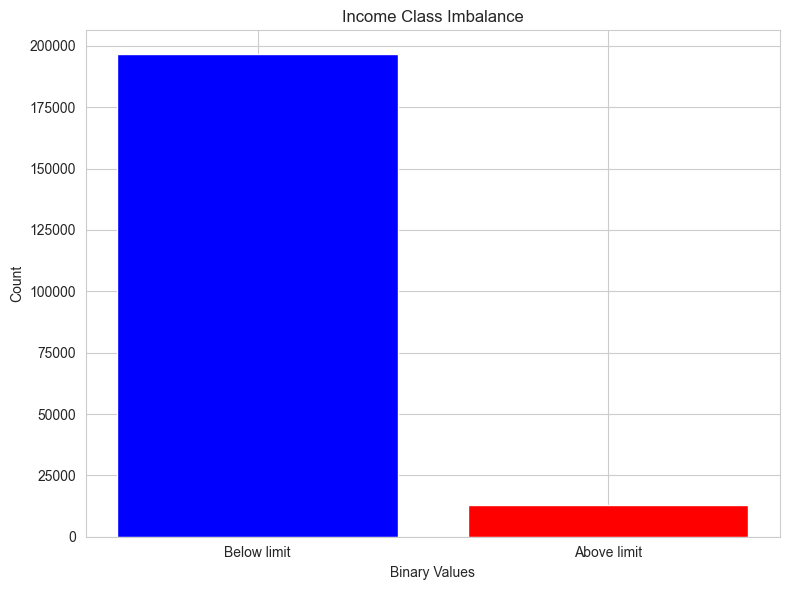

In [12]:
# Have a deeper look at the class imbalance and visualize for better perspective.

print('The class Imbalance in the data is given below')
display(data['income_above_limit'].value_counts())
print('---------------------------------------------------------------\n')
print('The class imbalance in terms of percentage is given below ')
display(data['income_above_limit'].value_counts(normalize=True))
print('----------------------------------------------------------------\n')

# Count the occurrences of each value
income_value_counts = data['income_above_limit'].value_counts()

# Bar chart showing the class imbalance.
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(income_value_counts.index, income_value_counts.values, color=["blue", "red"])
plt.xlabel("Binary Values")
plt.ylabel("Count")
plt.title("Income Class Imbalance")
plt.xticks(rotation=0)  # Ensure readable x-axis labels
plt.tight_layout()
plt.show()



### We are following the business case where 'fairness' is a key requirement, so we will have to apply ballancing technique.

In [73]:
data.income_above_limit = np.where(data.income_above_limit == 'Above limit',1,0)

In [15]:
strategy={'income_above_limit':'re-balance'}

## Variable 'Age"

% NA: 0.0 %


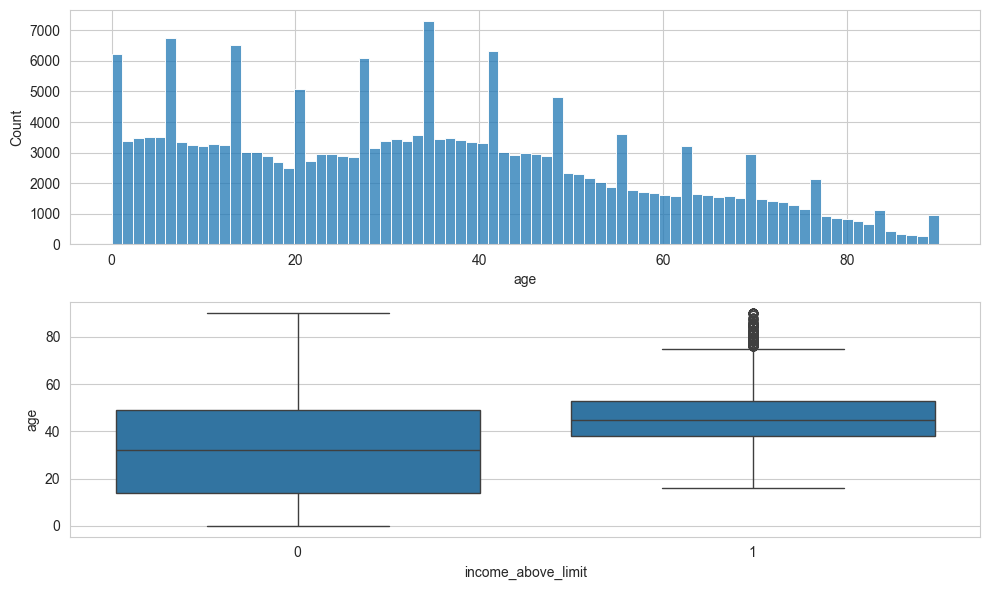

In [75]:
num_eda(data,'age','income_above_limit')

# To discussion - I think for our business case we should drop age < 16

% NA: 0.0 %


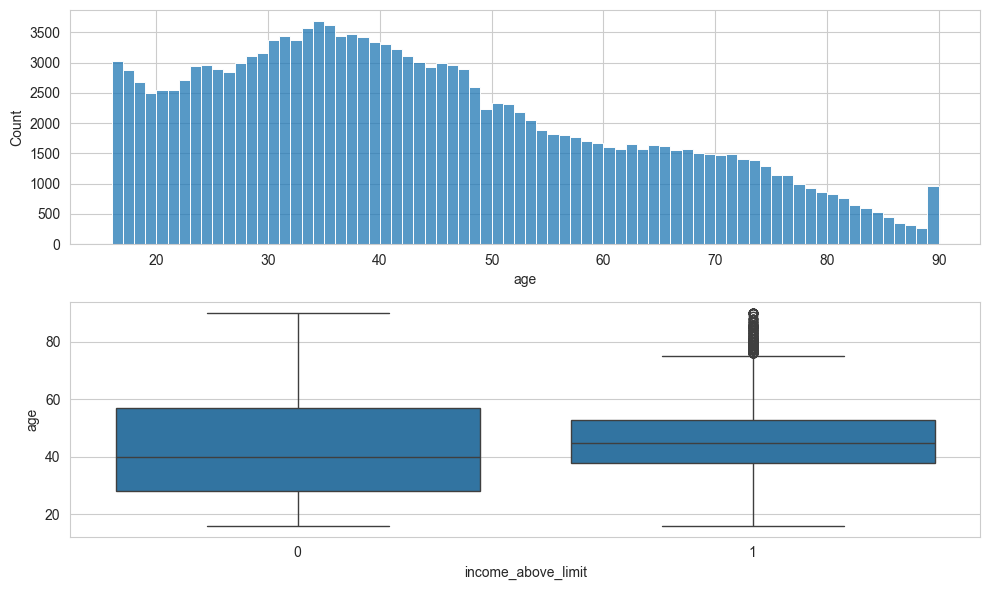

In [96]:
num_eda(data.loc[data.age>=18],'age','income_above_limit')

In [84]:
strategy['age']='research: Impute with median (for data in production); StandardScaler. Production: cut into bins OneHotEncoder'
num_col = ['age']
# we will have to use explainable model and it works poorly with non-linear relationships

In [77]:
data_18 = data.loc[data.age>=18]

## Variable 'gender

Categories: gender
Female    82871
Male      73937
Name: count, dtype: int64 
% NA: 0.0 %


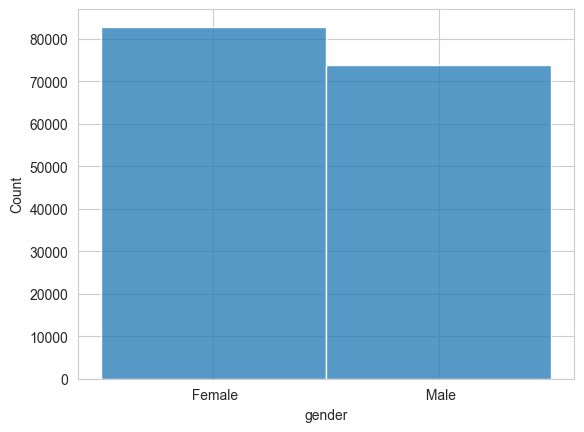

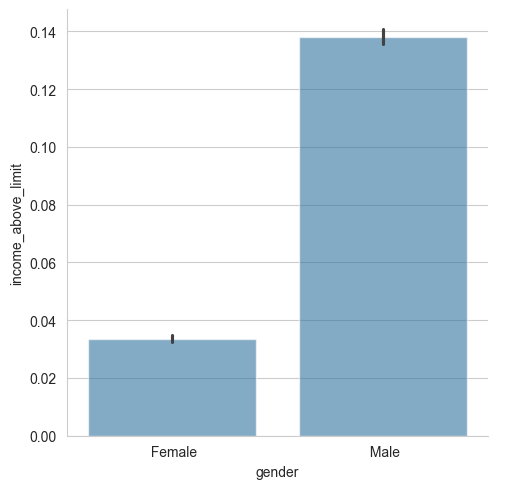

In [99]:
cat_eda(data_18,'gender','income_above_limit')

In [100]:
strategy['gender']='research: Impute with median (for data in production); StandardScaler. Production: drop due to discrimination'
num_col = ['age']

In [9]:
cat_col = data.columns[data.dtypes==np.object_]
num_col = data.columns[data.dtypes!=np.object_]

In [10]:
num_col

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')

In [9]:
for i in num_col:
    print(f'Variable: {i}\n'
          f'Min {np.min(data[i])}; Max {np.max(data[i])}; Average {np.average(data[i])}; NAN {np.sum(data[i].isna())}; 0-value {np.sum(data[i]==0)}.')

Variable: age
Min 0; Max 90; Average 34.518728013021544; NAN 0; 0-value 3041.
Variable: employment_stat
Min 0; Max 2; Average 0.17675979360283342; NAN 0; 0-value 189556.
Variable: wage_per_hour
Min 0; Max 9999; Average 55.43348655602175; NAN 0; 0-value 197643.
Variable: working_week_per_year
Min 0; Max 52; Average 23.158850400240574; NAN 0; 0-value 100688.
Variable: industry_code
Min 0; Max 51; Average 15.33239776800844; NAN 0; 0-value 105694.
Variable: occupation_code
Min 0; Max 46; Average 11.321734232621635; NAN 0; 0-value 105694.
Variable: total_employed
Min 0; Max 6; Average 1.9560666160697664; NAN 0; 0-value 100688.
Variable: vet_benefit
Min 0; Max 2; Average 1.515854490952224; NAN 0; 0-value 49672.
Variable: gains
Min 0; Max 99999; Average 435.9268874791765; NAN 0; 0-value 201669.
Variable: losses
Min 0; Max 4608; Average 36.88173690566542; NAN 0; 0-value 205437.
Variable: stocks_status
Min 0; Max 99999; Average 194.53342020725637; NAN 0; 0-value 187467.
Variable: mig_year
Min 9

In [10]:
for i in num_col:
    print(f'Variable: {i}\n'
          f'Min {np.min(data[i])} Max {np.max(data[i])} Average {np.average(data[i])}.')

Variable: age
Min 0 Max 90 Average 34.518728013021544.
Variable: employment_stat
Min 0 Max 2 Average 0.17675979360283342.
Variable: wage_per_hour
Min 0 Max 9999 Average 55.43348655602175.
Variable: working_week_per_year
Min 0 Max 52 Average 23.158850400240574.
Variable: industry_code
Min 0 Max 51 Average 15.33239776800844.
Variable: occupation_code
Min 0 Max 46 Average 11.321734232621635.
Variable: total_employed
Min 0 Max 6 Average 1.9560666160697664.
Variable: vet_benefit
Min 0 Max 2 Average 1.515854490952224.
Variable: gains
Min 0 Max 99999 Average 435.9268874791765.
Variable: losses
Min 0 Max 4608 Average 36.88173690566542.
Variable: stocks_status
Min 0 Max 99999 Average 194.53342020725637.
Variable: mig_year
Min 94 Max 95 Average 94.49974462885264.
Variable: importance_of_record
Min 37.87 Max 18656.3 Average 1740.8883235242172.


In [11]:
for i in cat_col:
    print(f'Variable {i}; NAN - {np.sum(data[i].isna())}')
    display(data[i].value_counts())

Variable gender; NAN - 0


gender
Female    108784
Male      100715
Name: count, dtype: int64

Variable education; NAN - 0


education
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: count, dtype: int64

Variable class; NAN - 105245


class
Private                           75617
Self-employed-not incorporated     8957
Local government                   8093
State government                   4480
Self-employed-incorporated         3444
Federal government                 3047
Never worked                        449
Without pay                         167
Name: count, dtype: int64

Variable education_institute; NAN - 196197


education_institute
High school              7247
College or university    6055
Name: count, dtype: int64

Variable marital_status; NAN - 0


marital_status
Never married                      90723
Married-civilian spouse present    88407
Divorced                           13456
Widowed                            11029
Separated                           3596
Married-spouse absent               1568
Married-A F spouse present           720
Name: count, dtype: int64

Variable race; NAN - 0


race
White                          175709
Black                           21394
Asian or Pacific Islander        6056
Other                            3927
Amer Indian Aleut or Eskimo      2413
Name: count, dtype: int64

Variable is_hispanic; NAN - 0


is_hispanic
All other                    180404
Mexican-American               8509
Mexican (Mexicano)             7614
Central or South American      4176
Puerto Rican                   3435
Other Spanish                  2612
Cuban                          1231
NA                              882
Chicano                         331
Do not know                     305
Name: count, dtype: int64

Variable employment_commitment; NAN - 0


employment_commitment
Children or Armed Forces              129789
Full-time schedules                    42787
Not in labor force                     28187
PT for non-econ reasons usually FT      3549
Unemployed full-time                    2538
PT for econ reasons usually PT          1243
Unemployed part- time                    866
PT for econ reasons usually FT           540
Name: count, dtype: int64

Variable unemployment_reason; NAN - 202979


unemployment_reason
Other job loser          2242
Re-entrant               2154
Job loser - on layoff    1050
Job leaver                625
New entrant               449
Name: count, dtype: int64

Variable is_labor_union; NAN - 189420


is_labor_union
 No     16968
Same     3111
Name: count, dtype: int64

Variable industry_code_main; NAN - 0


industry_code_main
Not in universe or children            105694
Retail trade                            18040
Manufacturing-durable goods              9336
Education                                8739
Manufacturing-nondurable goods           7232
Construction                             6414
Finance insurance and real estate        6336
Business and repair services             6021
Medical except hospital                  4934
Public administration                    4706
Other professional services              4627
Transportation                           4419
Hospital services                        4088
Wholesale trade                          3846
Agriculture                              3157
Personal services except private HH      3056
Social services                          2677
Entertainment                            1779
Communications                           1260
Utilities and sanitary services          1238
Private household services               1028
Mining         

Variable occupation_code_main; NAN - 105694


occupation_code_main
Adm support including clerical           15351
Professional specialty                   14544
Executive admin and managerial           13107
Other service                            12856
Sales                                    12487
Precision production craft & repair      11207
Machine operators assmblrs & inspctrs     6650
Handlers equip cleaners etc               4340
Transportation and material moving        4244
Farming forestry and fishing              3273
Technicians and related support           3136
Protective services                       1700
Private household services                 878
Armed Forces                                32
Name: count, dtype: int64

Variable household_stat; NAN - 0


household_stat
Householder                                        56195
Child <18 never marr not in subfamily              52707
Spouse of householder                              43579
Nonfamily householder                              23255
Child 18+ never marr Not in a subfamily            12784
Secondary individual                                6509
Other Rel 18+ ever marr not in subfamily            2071
Grandchild <18 never marr child of subfamily RP     1942
Other Rel 18+ never marr not in subfamily           1781
Grandchild <18 never marr not in subfamily          1109
Child 18+ ever marr Not in a subfamily              1029
Child under 18 of RP of unrel subfamily              747
RP of unrelated subfamily                            723
Other Rel 18+ spouse of subfamily RP                 697
Child 18+ ever marr RP of subfamily                  691
Other Rel 18+ ever marr RP of subfamily              679
Other Rel <18 never marr child of subfamily RP       654
Other Rel <18 ne

Variable household_summary; NAN - 0


household_summary
Householder                             79470
Child under 18 never married            52803
Spouse of householder                   43588
Child 18 or older                       15261
Other relative of householder           10157
Nonrelative of householder               8048
Group Quarters- Secondary individual      123
Child under 18 ever married                49
Name: count, dtype: int64

Variable under_18_family; NAN - 151654


under_18_family
Both parents present      40875
Mother only present       13266
Father only present        1962
Neither parent present     1742
Name: count, dtype: int64

Variable veterans_admin_questionnaire; NAN - 207415


veterans_admin_questionnaire
 No     1684
Same     400
Name: count, dtype: int64

Variable tax_status; NAN - 0


tax_status
Nonfiler                        78671
Joint both under 65             70617
Single                          39429
Joint both 65+                   8791
Head of household                7882
Joint one under 65 & one 65+     4109
Name: count, dtype: int64

Variable citizenship; NAN - 0


citizenship
Native                                          185669
 Foreign born- Not a citizen of U S              14127
 Foreign born- U S citizen by naturalization      6208
 Native- Born abroad of American Parent(s)        1924
 Native- Born in Puerto Rico or U S Outlying      1571
Name: count, dtype: int64

Variable country_of_birth_own; NAN - 0


country_of_birth_own
US                               185666
 Mexico                            6082
 ?                                 3667
 Puerto-Rico                       1458
 Philippines                        902
 Cuba                               889
 Germany                            858
 El-Salvador                        744
 Dominican-Republic                 741
 Canada                             741
 China                              508
 South Korea                        488
 England                            473
 Italy                              459
 India                              457
 Columbia                           455
 Poland                             385
 Vietnam                            384
 Guatemala                          373
 Jamaica                            352
 Japan                              350
 Ecuador                            277
 Peru                               277
 Nicaragua                          241
 Haiti             

Variable country_of_birth_father; NAN - 0


country_of_birth_father
US                               166968
 Mexico                           10517
 ?                                 7181
 Puerto-Rico                       2769
 Italy                             2358
 Dominican-Republic                1397
 Canada                            1396
 Germany                           1386
 Poland                            1262
 Philippines                       1215
 Cuba                              1208
 El-Salvador                       1058
 China                              878
 England                            829
 India                              645
 Columbia                           637
 Ireland                            558
 South Korea                        552
 Jamaica                            493
 Guatemala                          483
 Vietnam                            450
 Japan                              418
 Ecuador                            393
 Greece                             392
 Portugal       

Variable country_of_birth_mother; NAN - 0


country_of_birth_mother
US                               168233
 Mexico                           10326
 ?                                 6516
 Puerto-Rico                       2551
 Italy                             1974
 Canada                            1504
 Germany                           1396
 Philippines                       1302
 Cuba                              1210
 Dominican-Republic                1192
 El-Salvador                       1181
 Poland                            1164
 England                            928
 China                              800
 Ireland                            667
 India                              640
 Columbia                           627
 South Korea                        627
 Japan                              508
 Jamaica                            492
 Guatemala                          481
 Vietnam                            480
 Ecuador                            398
 Peru                               378
 Haiti          

Variable migration_code_change_in_msa; NAN - 1588


migration_code_change_in_msa
 ?                   104696
unchanged             86864
 MSA to MSA           11096
 NonMSA to nonMSA      2903
 MSA to nonMSA          778
 NonMSA to MSA          642
 Not identifiable       436
 Abroad to MSA          417
 Abroad to nonMSA        79
Name: count, dtype: int64

Variable migration_prev_sunbelt; NAN - 88452


migration_prev_sunbelt
 ?      104696
 No      10298
Same      6053
Name: count, dtype: int64

Variable migration_code_move_within_reg; NAN - 1588


migration_code_move_within_reg
 ?                               104696
unchanged                         86864
 Same county                      10196
 Different county same state       2946
 Different state in South          1003
 Different state in West            735
 Different state in Midwest         560
 Abroad                             498
 Different state in Northeast       413
Name: count, dtype: int64

Variable migration_code_change_in_reg; NAN - 1588


migration_code_change_in_reg
 ?                                 104696
unchanged                           86864
 Same county                        10196
 Different county same state         2946
 Different region                    1206
 Different state same division       1018
 Abroad                               498
 Different division same region       487
Name: count, dtype: int64

Variable residence_1_year_ago; NAN - 106284


residence_1_year_ago
Same    86864
 No     16351
Name: count, dtype: int64

Variable old_residence_reg; NAN - 193148


old_residence_reg
South        5056
West         4296
Midwest      3691
Northeast    2810
Abroad        498
Name: count, dtype: int64

Variable old_residence_state; NAN - 193148


old_residence_state
California              1849
Utah                    1104
Florida                  905
North Carolina           836
?                        741
Abroad                   635
Oklahoma                 633
Minnesota                620
Indiana                  565
North Dakota             510
New Mexico               478
Michigan                 443
Alaska                   284
Arizona                  277
Kentucky                 263
New Hampshire            252
Colorado                 251
Oregon                   247
Wyoming                  245
Georgia                  236
West Virginia            234
Ohio                     229
Montana                  225
Alabama                  221
Texas                    213
Arkansas                 212
New York                 206
Nebraska                 204
Tennessee                202
Mississippi              202
Pennsylvania             201
Louisiana                197
Vermont                  193
Iowa                   

Variable income_above_limit; NAN - 0


income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

## Exploratory Data Analysis.

In [101]:
data_18.to_parquet(os.path.join(DATA_PATH,'eda.gzip'))